# Teoria da Computação: Indecidibilidade
> *Autor: Davi Romero de Vasconcelos, daviromero@ufc.br, Universidade Federal do Ceará, Campus de Quixadá, Setembro de 2021*.
> *(Última atualização 07/02/2022)*

Este material foi preparado para a disciplina de Teoria da Computação com a finalidade de apresentar os conceitos básicos de indecidibilidades. Alguns conceitos serão apresentados na Linguagem de Programação Python. Para cada seção é apresentado um link (no título da seção) com um vídeo explicando o conteúdo a ser abordado. Uma Playlist com todo o conteúdo de Indecibilidade está disponível no [YouTube](https://youtube.com/playlist?list=PLfOnKvd6pFiqHc4KzlbttgnmWqihFPdFd).

# Implementação em Python de Máquina de Turing, PCP, PCPM e Máquina Universal
A célula abaixo contém a implementação em Python de Máquinas de Turing e algumas de suas variantes, bem como implementações da PCP, PCPM e Máquina Universal. 
Não é necessário conhecer o código aqui implementado ou mesmo ter um conhecimento profundo da linguagem Python. Basta acompanhar os exemplos e experimentar construir seus próprios modelos.
>*Execute a célula abaixo (`ctrl+enter` ou clicando no botão ao lado) para que o ambiente seja carregado com as classes implementadas.*


In [ ]:
from mt_ndmf import S_BLK_BOX
from mt import MT
from mt_exercicio import Exercicio_MT 
from pcp_exercicio import Exercicio_PCP
from pcp import PCP
from pcpm import PCPM
from encoder_lu2pcpm import Encoder_LU_to_PCPM
import ipywidgets as widgets


# [Indecidibilidade](https://www.youtube.com/watch?v=yKRap9oN08g&list=PLfOnKvd6pFiqHc4KzlbttgnmWqihFPdFd&index=1)
As linguagens podem ser classificas como
- **Recursivas (R)**, também denominadas de **Decidíveis**, que são aquelas que têm algoritmos, i.e., uma Máquina de Turing (MT) que sempre pára, quer aceite ou rejeite sua entrada.
- **Recursivamente Enumeráveis e Não-Recursivas (RE e não-R)** que são aquelas que só são resolvidos por MT que podem funcionar indefinidamente para entradas que ela não aceitam.
- **Não-Recursivamente Enumeráveis (não-RE)**, i.e., aquelas que não existem MT que as reconheçam.

Nos concentramos em técnicas para demonstrar **problemas indecidíveis**, i.e.,  que não tem algoritmos, independentemente se são ou não aceitos por uma MT que falha em parar para alguma entrada.

Para ilustrarmos problemas indecidíveis, apresentaremos uma codificação de Máquinas de Turing em strings binárias. Daí, mostraremos que o seguinte problema é **indecidível**: 
> A linguagem que consiste em pares $\langle M,w\rangle$, onde: 
- $M$ é uma MT codificada em binário com alfabeto de entrada $\{0,1\}$; 
- $w$ é uma string de 0's e 1's; 
- $M$ aceita $w$

Se o problema com entradas em binário é indecidível, então o problema mais geral também o é.


## Hierarquia das Linguagens

Na imagem abaixo apresentamoa a hierarquia das linguagens. Nas próximas seções, apresentaremos exemplos de linguagens indecidíveis:
- A $L_d$, chamada de Linguagem da Diagonalização, para a qual não existe uma Máquina de Turing que reconheça $L_d$;
- A $L_u$, chamada de Linguagem Universal, para a qual existe uma Máquina de Turing, denomidade de Máquina Universal, que reconhece a linguagem $L_u$, mas que não é recursiva.

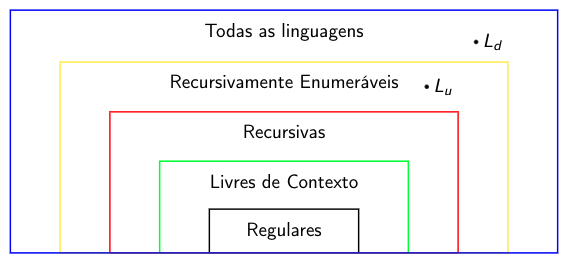




## [Complementos de Linguagens Recursivamente Enumerável e Recursiva](https://www.youtube.com/watch?v=wmNpAkwRvuI&list=PLfOnKvd6pFiqHc4KzlbttgnmWqihFPdFd&index=2)
Uma ferramenta poderosa para demonstrar que uma linguagem é Recursivamente Enumerável (RE), mas não Recursiva (R), é considerar a linguagem complemento.
Iremos demonstrar as seguintes relações entre RE e R:

1. **Teorema**: Se $L$ é uma linguagem recursiva, então $\overline{L}$ também é recursiva.
>
  >**Prova**: Seja $M$ uma MT que sempre pára tal que $L=L(M)$. Construiremos uma MT $\overline{M}$ tal que $\overline{L}=L(\overline{M}$). $\overline{M}$ será construída da seguinte forma:
   1. Os estados de aceitação de $M$ são transformados em estados de não-aceitação de $\overline{M}$ sem nenhuma transição a partir deles, i.e., $\overline{M}$ irá parar sem aceitar.
   1. $\overline{M}$ tem um estado de aceitação $r$ sem nenhuma transição a partir dele.
  1. Para cada combinação de estado de não-aceitação $q_i$ de $M$ e cada símbolo da fita $X_j$ que não tem transição, adicione uma transição em $\overline{M}$ ao estado de aceitação $r$, i.e., adicione em $\overline{M}$ $\delta(q_i,X_j)=\langle r,X_j,D\rangle$.
>
> Vejamos um exemplo da Máquina de Turing para a Linguagem $L_{0^n1^n}=\{0^n1^n\}$ e a sua linguagem complemento, i.e., todas as palavras que não tem n 0's seguidos de n 1's
> 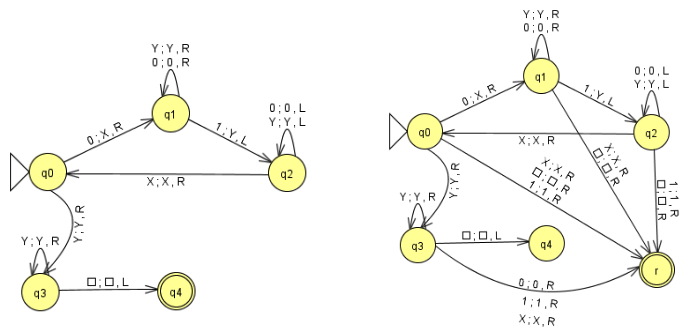

1. **Teorema**: Se uma Linguagem $L$ e seu complemento $\overline{L}$ são Recursivamente Enumeráveis (RE), então $L$ é recursiva (e também $\overline{L}$).
>
> **Prova**: Sejam $M_1$ e $M_2$ MTs tais que $L=L(M_1)$ e $\overline{L}=L(M_2)$. Construiremos uma MT $M$ de duas fitas, simulando $M_1$ e $M_2$ em paralelo, onde cada um dos estados de $M_1$ e $M_2$ é um componente do estado de $M$.
>
> 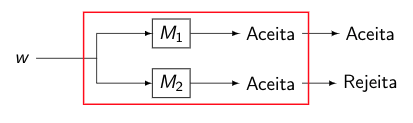

1. Se $L$ é Recursivamente Enumerável (RE) e não-recursiva, então $\overline{L}$ não é RE
   > **Demonstração**:
   >
   > 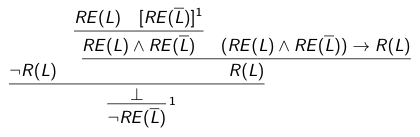



## [Codificando Programas como Números](https://www.youtube.com/watch?v=0Uywzeu5HkM&list=PLfOnKvd6pFiqHc4KzlbttgnmWqihFPdFd&index=3)

### Representação de Tipos de Dados
Tipos de Dados são importantes em programação. Porém, há sempre um único tipo, que pode ser strings Binárias. Muitas vezes é mais conveniente converter strings binárias em inteiros, i.e., em um conjunto contável (enumerável).

Strings que são programas também podem ser representados por strings binárias, que por sua vez podem ser representados por inteiros. Assim, podemos falar do programa número 100, por exemplo.

  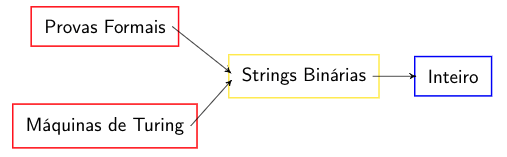

## Convertendo Strings Binárias em Números
Podemos converter Strings Binárias como números inteiros. Assim, podemos falar sobre a $i-$ésima String.

Seja $T:\{0,1\}^*\rightarrow \mathbb{N}$ uma função que converte strings Binárias em inteiros:
- $T(101)=1*2^0+0*2^1+1*2^2=1+0+4=5$.
- $T(0101)=1*2^0+0*2^1+1*2^2+0*2^3=1+0+4+0=5$.

Logo, a transformação óbvia tem mais de uma string levada no mesmo inteiro. Para solucionar, basta colocar antes do mapeamento ${\color{blue}1}$ antes de $w$, i.e., $T({\color{blue}1}w)$.
- $T({\color{blue}1}101)=1*2^0+0*2^1+1*2^2+1*2^3 =1+0+4+8=13$.
- $T({\color{blue}1}0101)=1*2^0+0*2^1+1*2^2+0*2^3+1*2^4=1+0+4+0+16=21$.

Para fazermos uma bijeção \(T\) de strings binárias em números, colocamos antes do mapeamento ${\color{blue}1}$ antes de $w$, i.e., $T({\color{blue}1}w)$.    
    
\begin{align*}
    \textrm{String Binária} &\longleftrightarrow  \textrm{Número} &\\
    {\color{blue}1}~\epsilon &\longleftrightarrow 1=1*2^0 &\\
    {\color{blue}1}~0 &\longleftrightarrow 2=0*2^0+1*2^1&\\
    {\color{blue}1}~1 &\longleftrightarrow 3=1*2^0+1*2^1&\\
    {\color{blue}1}~00 &\longleftrightarrow 4 =0*2^0+0*2^1+1*2^2&\\
    {\color{blue}1}~01 &\longleftrightarrow 5 =1*2^0+0*2^1+1*2^2&\\
    {\color{blue}1}~10 &\longleftrightarrow 6 =0*2^0+1*2^1+1*2^2&\\
    {\color{blue}1}~11 &\longleftrightarrow 7 =1*2^0+1*2^1+1*2^2&\\
    \vdots &\longleftrightarrow& \vdots
\end{align*}

Assim, o **conjunto-potência de** $2^\mathbb{N}$ é incontável, pois $\{0,1\}^*\equiv \mathbb{N}$.

In [ ]:
#@title Exercício: Convertendo Palavras em Binário em Número
#@markdown Execute essa célula para gerar o seu exercício. Então, codifique a Palavra abaixo em um número.. 

Exercicio_MT.encode_string(size=3)

In [ ]:
#@title Exercício: Convertendo Palavras em Binário em Número
#@markdown Execute essa célula para gerar o seu exercício. Então, codifique a Palavra abaixo em um número.. 

Exercicio_MT.encode_string(size=4)

In [ ]:
#@title Exercício: Convertendo Palavras em Binário em Número
#@markdown Execute essa célula para gerar o seu exercício. Então, codifique a Palavra abaixo em um número.. 

Exercicio_MT.encode_string(size=5)

## Provas como Strings Binárias
 Uma prova formal é uma sequência de expressões lógicas, onde cada expressão segue das anteriores. Portanto, precisamos de uma forma de separá-las. Também precisamos indicar quais expressões são assumidas (premissas) e quais seguem das anteriores. A técnica é a seguinte:
- Dada um string binária, adicione antes de cada bit um $0$, e.g., $101$ será ${\color{red}{0}}1{\color{red}{0}}0{\color{red}{0}}1$. Como consequência, não teremos dois ou mais 1's seguidos.
- Use a string de dois ou mais 1's como um símbolo, e.g., ${\color{blue}{11}}$="fim da expressão" e ${\color{yellow}{111}}=$"expressão assumida".

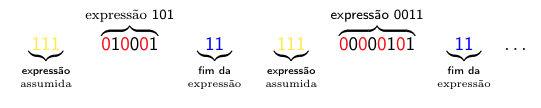


## [Máquinas de Turing como Strings Binárias](https://www.youtube.com/watch?v=8R5007xJF_E&list=PLfOnKvd6pFiqHc4KzlbttgnmWqihFPdFd&index=4)
Para representarmos uma MT $M=\langle Q,\{0,1\},\Gamma,\delta,q_1,\Box,F\rangle$, vamos atribuir inteiros aos estados, $\Gamma$ e $L$, $R$ e $S$.
- $Q=\{q_1,q_2,\ldots, q_r\}$, ou seja, os estados serão identificados por seus índices $1,2,\ldots, r$. Assumimos que:
  - O estado inicial é o $q_1$;
  - Temos apenas um estado final $F=\{q_2\}$. Note que a MT sempre pára quando entra em um estado de aceitação.
- $\Gamma=\{X_1, X_2, X_3,\ldots X_s\}$, onde $X_1$ é o $0$, $X_2$ é o $1$ e $X_3$ é o $\Box$.
- $L$ será o $D_1$, $R$ será o $D_2$ e $S$ será o $D_3$.

Agora podemos codificar a função de transição $\delta$:

$$\delta(q_i.X_j)=\langle q_k, X_l, D_m\rangle\Longleftrightarrow 0^i{\color{blue}{1}}0^j{\color{blue}{1}}0^k{\color{blue}{1}}0^l{\color{blue}{1}}0^m$$

Note que todos $i,j,k,l,m\geq 1$ e, portanto, nunca teremos dois ou mais 1's consecutivos no código de uma transição.

Para codificar a MT M, precisamos representar todas as transições e utilizaremos ${\color{yellow}{11}}$ para a separação entre as transições. Assim:
$$C_1{\color{yellow}{11}}C_2{\color{yellow}{11}}C_3\ldots {\color{yellow}{11}}C_n$$
Para representarmos a MT M e a palavra $w$, usamos o separador ${\color{green}{111}}$. Assim, $\langle M,w\rangle$ é codificado por:
$$C_1{\color{yellow}{11}}C_2{\color{yellow}{11}}C_3\ldots {\color{yellow}{11}}C_n{\color{green}{111}}w$$
Dessa feita, podemos representar uma MT e sua entrada como uma string binária que, por sua vez, pode ser representada como um inteiro. Portanto, podemos falar da i-ésima Máquina de Turing $M_i$. Note que alguns números (e strings binárias) não representarão MT e podemos pensar neles como MT com um estado e nenhum transição, ou seja, a linguagem aceita será vazia.

Vejamos um exemplo:

Seja MT $M_1=\langle\{q_1,q_2,q_3\},$ $\{0,1\},\{0,1,\Box\},\delta,q_1,\Box,\{q_2\}\rangle$, onde:
- $\delta(q_1,1)=\langle q_3,0,R\rangle$ 
- $\delta(q_3,0)=\langle q_1,1,R\rangle$
- $\delta(q_3,1)=\langle q_2,0,R\rangle$    
- $\delta(q_3,\Box)=\langle q_3,1,L\rangle$

A representação binária de $M_1$ é a seguinte string:
$$\overbrace{0}^{0^1}~{\color{blue}{1}}~
  \overbrace{00}^{0^2}~{\color{blue}{1}}~
  \overbrace{000}^{0^3}~{\color{blue}{1}}~
  \overbrace{0}^{0^1}~{\color{blue}{1}}~
  \overbrace{00}^{0^2}$$

$${\color{yellow}{11}}~~000{\color{blue}{1}}0{\color{blue}{1}}0{\color{blue}{1}}
00{\color{blue}{1}}00$$
$${\color{yellow}{11}}~~000{\color{blue}{1}}00{\color{blue}{1}}00{\color{blue}{1}}0{\color{blue}{1}}00$$
$${\color{yellow}{11}}~~000{\color{blue}{1}}000{\color{blue}{1}}000{\color{blue}{1}}00{\color{blue}{1}}0$$


In [ ]:
#@title Exercício: Codifição de Máquina de Turing em binário
#@markdown Execute essa célula para gerar o seu exercício. Então, codifique a Máquina de Turing abaixo em binário. 

Exercicio_MT.encode(num_states=3, num_extra_transition=2)

In [ ]:
#@title Exercício: Codifição de Máquina de Turing em binário
#@markdown Execute essa célula para gerar o seu exercício. Então, codifique a Máquina de Turing abaixo em binário. 

Exercicio_MT.encode(num_states=4, num_extra_transition=2)

In [ ]:
#@title Exercício: Codifição de Máquina de Turing em binário
#@markdown Execute essa célula para gerar o seu exercício. Então, codifique a Máquina de Turing abaixo em binário. 

Exercicio_MT.encode(num_states=5, num_extra_transition=3)

## Linguagens não-RE: A Linguagem da Diagonalização
Nesta seção, iremos demonstrar que existem linguagens que são não recursivamente enumerável, ou seja, que não existem Máquinas de Turing que reconheçam essas linguagens. Inicialmente, revisaremos o princípio da diagonalização de Cantor e, na sequência, usaremos esse princípio para demonstrar a **Linguagem da Diagonalização** é não Recursivamente Enumerável.

### [Revisão sobre o Princípio da Diagonalização](https://youtu.be/NVPZalpSFpE)
Abaixo iremos apresentar o princípio da diagonalização de Cantor.
> **Príncipio da Diagonalizção de Cantor**
>
>- Seja $R$ uma relação binária em um conjunto $A$;
- Seja $R_a=\{b:b\in A\text{ e }\langle a,b\rangle\in R\}$, para cada $a\in A$.
>
> Defina o **Conjunto Diagonal** $D=\{a:a\in A\text{ e }\langle a,a\rangle\notin R\}$.
>  Daí, $D$ será distinto de cada $R_a$.

**Exemplo:** 
> Considere que:
- $A=\{a,b,c,d,e,f\}$
- $R=\{\langle a,b\rangle,\langle a,d\rangle,\langle b,b\rangle,\langle b,c\rangle,\langle c,c\rangle,\langle d,b\rangle,\langle d,c\rangle,\langle d,e\rangle,\langle d,f\rangle,\langle e,d\rangle,\langle e,f\rangle,\langle f,a\rangle,\langle f,c\rangle,\langle f,d\rangle,\langle f,e\rangle\}$ 
>
> Temos que:
> - $R_a=\{b,d\}$, $R_b=\{b,c\}$, $R_c=\{c\}$, $R_d=\{b,c,e,f\}$,$R_e=\{e,f\}$, $R_f=\{a,c,d,e\}$
>
> Podemos concluir que a Diagonal é: $D=\{a,d,f\}$. 
>
> Veja tabela abaixo.
>
> 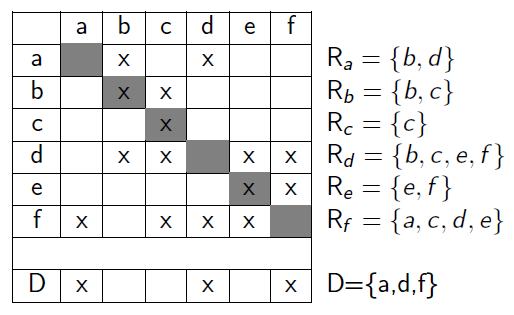


 

In [ ]:
#@title Exercício: Diagonal de Cantor
#@markdown Execute essa célula para gerar o seu exercício. Então, digite a diagonal, ou seja, o inverso dos elementos da diagonal. 
#@markdown **Observação: os elementos deverão ser separados por espaço.** 
print('Seja a matriz abaixo')
Exercicio_MT.diagonal(size=4)

In [ ]:
#@title Exercício: Diagonal de Cantor
#@markdown Execute essa célula para gerar o seu exercício. Então, digite a diagonal, ou seja, o inverso dos elementos da diagonal. 
#@markdown **Observação: os elementos deverão ser separados por espaço.** 
print('Seja a matriz abaixo')
Exercicio_MT.diagonal(size=5)

In [ ]:
#@title Exercício: Diagonal de Cantor
#@markdown Execute essa célula para gerar o seu exercício. Então, digite a diagonal, ou seja, o inverso dos elementos da diagonal. 
#@markdown **Observação: os elementos deverão ser separados por espaço.** 
print('Seja a matriz abaixo')
Exercicio_MT.diagonal(size=6)

### O Conjunto $2^\mathbb{N}$ é incontável
> **Demonstração:** 
>
>Suponha que $2^\mathbb{N}$ seja contável, ou seja, existe alguma forma de enumerar todos os membros de $2^\mathbb{N}=\{R_0,R_1,R_2\ldots\}$. 
- Note que os elementos $R_0,R_1,R_2\ldots$ correspondem aos conjuntos $R_a$ do enunciado do princípio da diagonalização, para a relação $R=\{\langle i,j\rangle:j\in R_i\}$. 
>
> Agora, considere o conjunto da diagonal $D=\{n:n\in\mathbb{N}\text{ e } n\notin R_n\}$. 
>
> Assim, $D$ é distinto de todos $R_a,\forall a\in\mathbb{N}$.
> 
> Portanto, $2^\mathbb{N}$ é incontável. 
>
> Já vimos que $\{0,1\}^*$ tem a mesma cardinalidade de $\mathbb{N}$, vide seção que apresenta a codificação de uma string binária em um número. Logo, **o conjunto de todas as linguagens sobre o alfabeto binário $2^{\{0,1\}^*}$ também é incontável**.
>
> 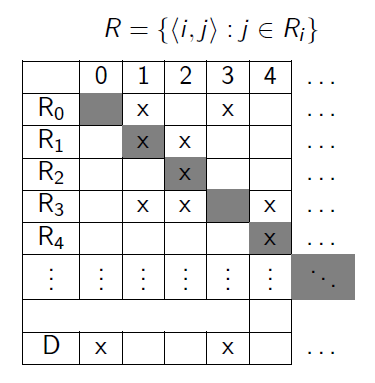

### [A Linguagem da Diagonalização](https://www.youtube.com/watch?v=zcwWs28aCoA&list=PLfOnKvd6pFiqHc4KzlbttgnmWqihFPdFd&index=5)
A **Linguagem da Diagonalização** não é recursivamente enumerável

**Teorema**: $L_d=\{w_i|w_i$ é a i-ésima MT  $M_i$ e a i-ésima string $w_i$ tal que $w_i\not\in L(M_i)\}$
> **Prova**: 
> Iremos provar por contradição. 
>
> 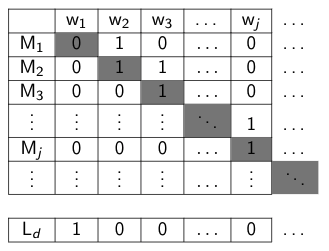
>
> Suponha que $L_d$ seja definida por uma MT $M_j$, i.e., $L_d=L(M_j)$. Seja $x$ a j-ésima string. Daí:
1. $x\in L(M_j)$, então por Def. $x\not\in L(d)=L(M_j)$
1. $x\not\in L(M_j)$, então por Def. $x\in L(d)=L(M_j)$
>
>    Daí, temos uma contradição e $L_d$ não pode ser definido por uma MT.
>

## [Linguagens RE e não-R: A Linguagem Universal](https://www.youtube.com/watch?v=SbsPSOCFB7E&list=PLfOnKvd6pFiqHc4KzlbttgnmWqihFPdFd&index=7)
Existem Linguagens que são Recursivamente Enumeráveis, mas não são Recursivas. Nesta seção, apresentaremos a Linguagem Universal, bem como a Máquina de Turing Universal, que reconhece a Linguagem Universal. Todavia, mostraremos que essa linguagem não é recursiva.

### Linguagem Universal

Definimos $L_u$, a **Linguagem Universal**, como o conjunto de strings binárias que codificam um par $\langle M,w\rangle$, onde:
>  - $M$ é uma MT com o alfabeto binário
>  - $w\in \{0,1\}^*$, tal que $w\in L(M)$ 

Assim, $L_u$ é o conjunto de strings que representa uma MT e uma entrada aceita por esta MT.

Mostraremos que existe um MT $U$, denominada de **Máquina Universal**, tal que $L_u=L(U)$.

### Máquina Universal

  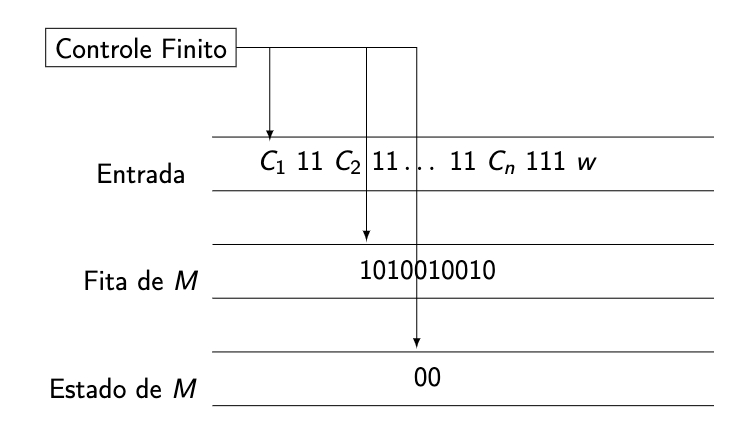


Para descrevermos a máquina $U$, considere uma máquina com 3 fitas
1. Na primeira fita, a máquina de turing $M$ e a palavra $w$ são armazenadas, conforme nossa codificação binária.
1. A segunda fita será usada para guardar a fita simulada de $M$, usando o mesmo formato empregado para o código de $M$, i.e., o símbolo $X_i$ de $M$ será representado por $0^i$ e os símbolos serão separados por $1$'s. Lembre-se que $X_1$ é o $0$, $X_2$ é o $00$ e $\Box$ é o $000$. Assim, $0110$ será representado por ${\color{blue}1}0{\color{blue}1}00{\color{blue}1}00{\color{blue}1}0$.
1. A terceira fita contém o estado de $M$, usando o mesmo formato empregado para o código de $M$, i.e., o estado $q_k$ será representado por $0^k$.
1. A operação de $U$ pode ser resumida por:
  1. Examinar a entrada para ter certeza que a codificação é legítima para uma MT $M$ e um entrada $w$. Caso contrário $U$ pára sem aceitar.
  1. Iniciar a segunda fita para conter a entrada de $w$ em sua codificação.
  1. Colocar 0, representando o estado inicial, na terceira fita.
1. Para simular um movimento de $M$, $U$ procura na $1^a$ fita por uma transição $0^i{\color{blue}{1}}0^j{\color{blue}{1}}0^k{\color{blue}{1}}0^l{\color{blue}{1}}0^m$, tal que $0^i$ é o estado na $3^a$ fita e $0^j$ é o símbolo de $M$ que na posição da $2^a$ fita. Daí, $U$ deve:
    1. Mudar o conteúdo da $3^a$ fita para $0^k$
    1. Substituir $0^j$ por $0^l$ na $2^a$ fita.
    1. Mover a cabeça da $2^a$ fita para o próximo $1$ à esquerda (se $m=1$) ou à direita (se $m=2$).
1. Se em $M$ não existe transição a partir de um estado e um símbolo da fita, então $U$ pára.
1. Se $M$ entrar em um estado de aceitação, então $U$ aceita. Dessa maneira, $U$ simula $M$ sobre $w$ 
>
>   $U \text{ aceita o par }\langle M,w\rangle \Longleftrightarrow M\text{ aceita }w$

Suponha que $L_u$ seja recursiva. Daí, temos que $\overline{L_u}$ é recursiva. Então, podemos usar $\overline{U}$ para decidir $w111w$, i.e., podemos decidir a linguagem da diagonalização $L_d$. 

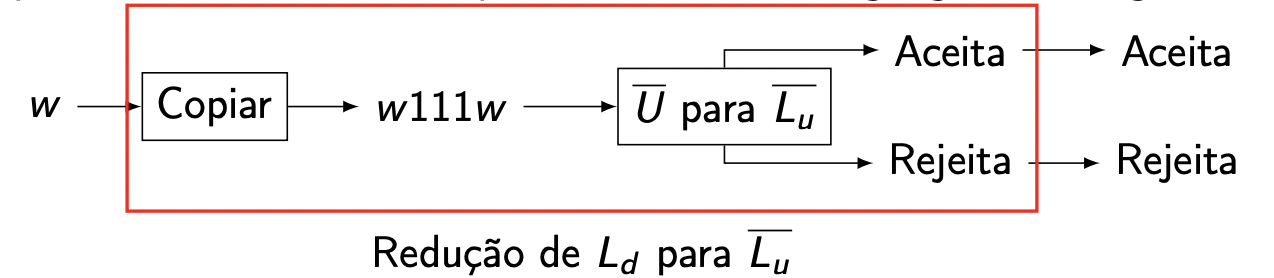    

Sabemos que $L_d$ não é recursivamente enumerável e temos uma contradição. Logo, $L_u$ não é recursiva**.



Abaixo, ilustramos o movimento da Máquina Universal $U$
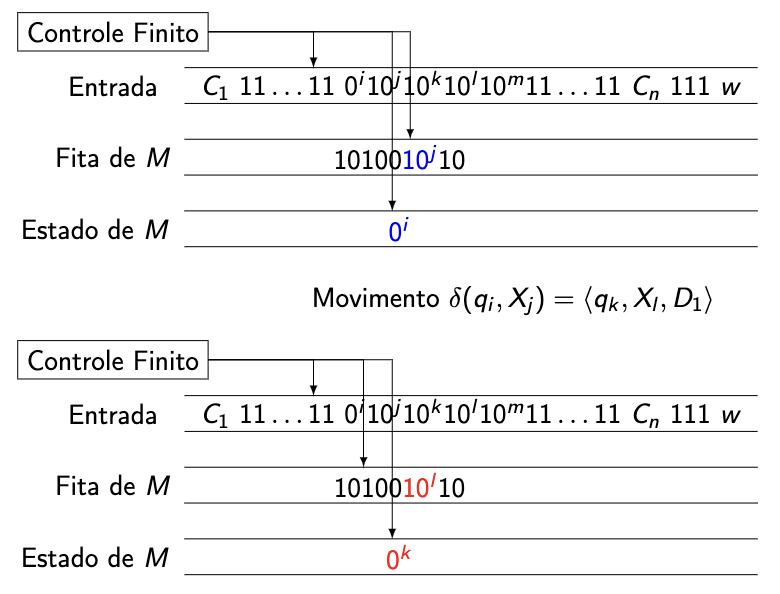

### Máquina de Turing Universal: Exemplo de Computação que Para

> **Exemplo:** Considere a MT $M_1=\langle\{q_1,q_2,q_3\},$ $\{0,1\},\{0,1,\Box\},\delta,q_1,\Box,\{q_2\}\rangle$, onde:
- $\delta(q_1,0)=\langle q_3,0,R\rangle$
- $\delta(q_3,0)=\langle q_1,0,L\rangle$
- $\delta(q_3,1)=\langle q_2,0,R\rangle$
> 
> A codificação de $M_1$ e da palavra $01$ em binário é:
> 
> $${0\color{blue}{1}}0{\color{blue}{1}}000{\color{blue}{1}}0{\color{blue}{1}}00
    {\color{yellow}{11}}
    000{\color{blue}{1}}0{\color{blue}{1}}0{\color{blue}{1}}0{\color{blue}{1}}0
    {\color{yellow}{11}}
    000{\color{blue}{1}}00{\color{blue}{1}}00{\color{blue}{1}}0{\color{blue}{1}}00
    {\color{red}{111}}01
    $$    
> 
> 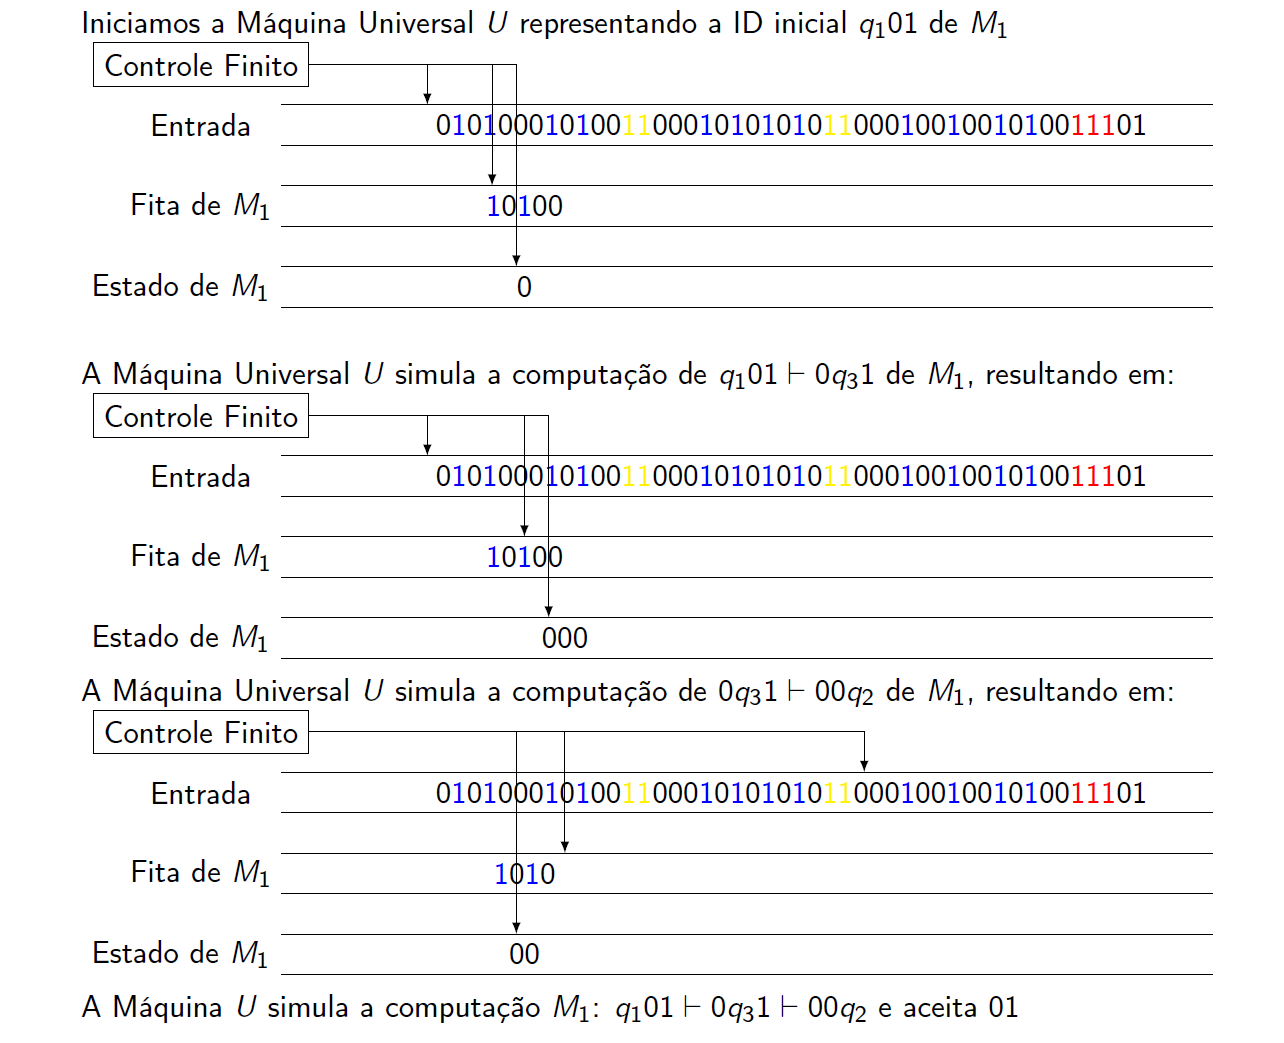

In [ ]:
#@title Exemplo: Máquina de Turing na Máquina de Turing Universal
#@markdown Execute essa célula para gerar o seu exercício. Então, codifique a Máquina de Turing em sua descrição instântanea na Máquina de Turing Universal (MTU). Considere que a MTU tem apenas um estado, denominado de Controle. Lembre-se que uma descrição instântanea de uma MT de um fita, por exemplo, $01q_A11$ tem como prefixo a palavra $01$, estado $q_A$ e sufixo $11$. Portanto, represente a descrição instântanea da MTU que tem 3 fitas com seus prefixos, estado Controle, e sufixos. 
Q = {'q1','q2','q3' }
Sigma = {'0','1'}
Gamma = {'0','1', ' '}
delta = {('q1','0'):('q3','0','R'),
         ('q3','0'):('q1','0','L'),
         ('q3','1'):('q2','0','R')}
q0 = 'q1'
blank=' ' 
F ={'q2'}
 
M = MT(Q,Sigma,Gamma,delta,q0,blank,F)

Exercicio_MT.mt_universal(M, steps=2, input_word='01')

### [Máquina de Turing Universal: Um exemplo de Computação que Não Para](https://www.youtube.com/watch?v=3bnNJ5nbE14&list=PLfOnKvd6pFiqHc4KzlbttgnmWqihFPdFd&index=7)

Abaixo, iremos apresentar um exemplo de uma computação na Máquina de Turing Universal.

> **Exemplo:** Considere a MT $M_1=\langle\{q_1,q_2,q_3\},$ $\{0,1\},\{0,1,\Box\},\delta,q_1, \Box,\{q_2\}\rangle$, onde:
- $\delta(q_1,0)=\langle q_3,0,R\rangle$
- $\delta(q_3,0)=\langle q_1,0,L\rangle$   
- $\delta(q_3,1)=\langle q_2,0,R\rangle$
> 
> A codificação de $M_1$ e da palavra $001$ em binário é:
>  
>  $${0\color{blue}{1}}0{\color{blue}{1}}000{\color{blue}{1}}0{\color{blue}{1}}00
    {\color{yellow}{11}}
    000{\color{blue}{1}}0{\color{blue}{1}}0{\color{blue}{1}}0{\color{blue}{1}}0
    {\color{yellow}{11}}
    000{\color{blue}{1}}00{\color{blue}{1}}00{\color{blue}{1}}0{\color{blue}{1}}00
    {\color{red}{111}}001
    $$ 
>
> 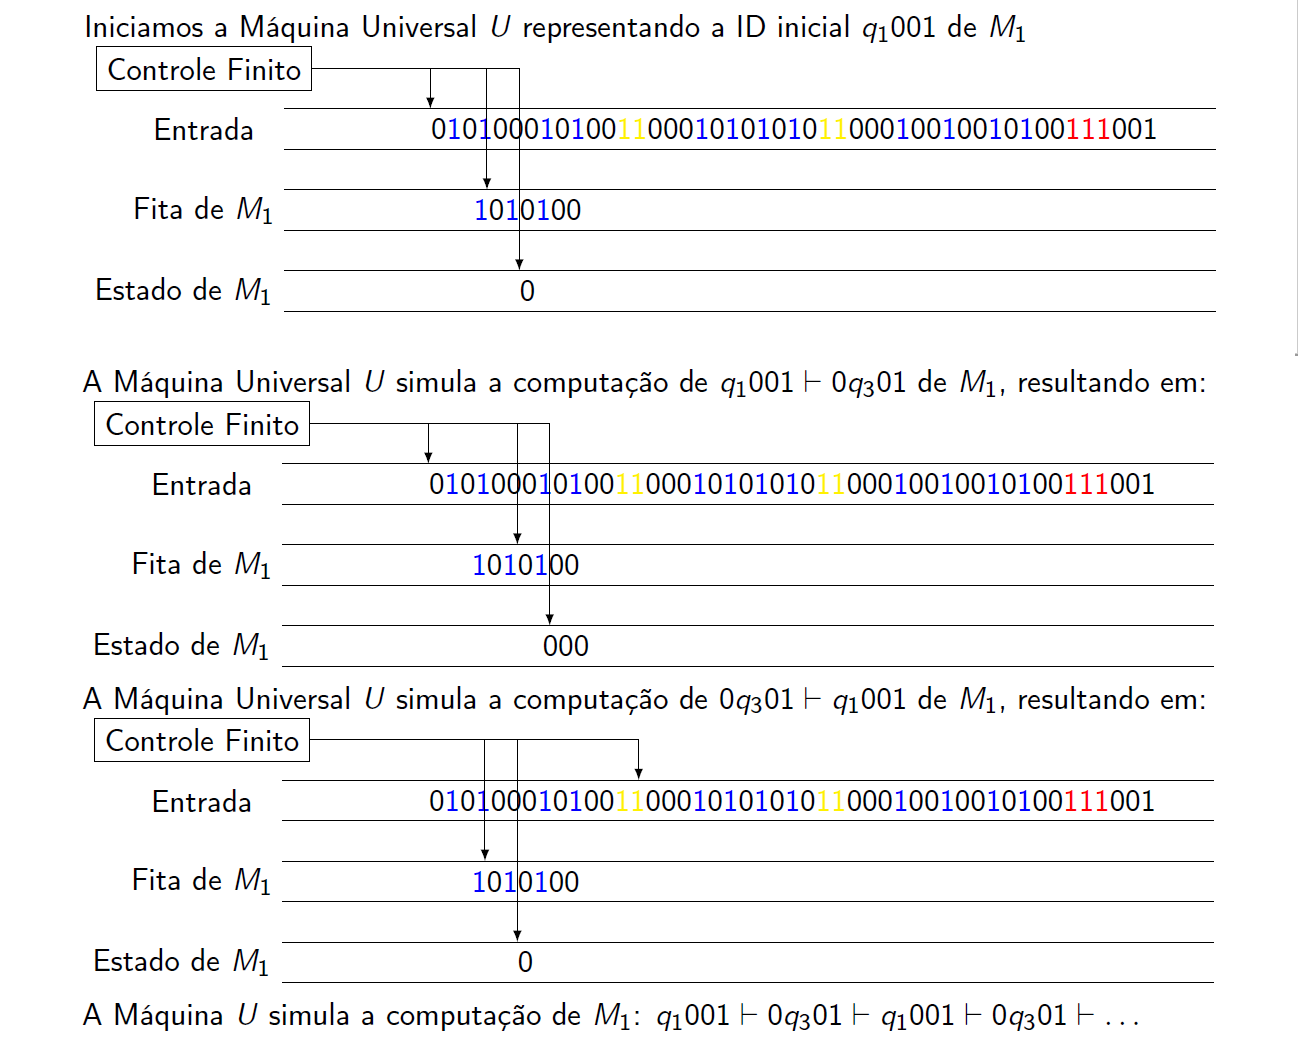


In [ ]:
#@title Exemplo: Máquina de Turing na Máquina de Turing Universal
#@markdown Execute essa célula para gerar o seu exercício. Então, codifique a Máquina de Turing em sua descrição instântanea na Máquina de Turing Universal (MTU). Considere que a MTU tem apenas um estado, denominado de Controle. Lembre-se que uma descrição instântanea de uma MT de um fita, por exemplo, $01q_A11$ tem como prefixo a palavra $01$, estado $q_A$ e sufixo $11$. Portanto, represente a descrição instântanea da MTU que tem 3 fitas com seus prefixos, estado Controle, e sufixos. 
Q = {'q1','q2','q3' }
Sigma = {'0','1'}
Gamma = {'0','1', ' '}
delta = {('q1','0'):('q3','0','R'),
         ('q3','0'):('q1','0','L'),
         ('q3','1'):('q2','0','R')}
q0 = 'q1'
blank=' ' 
F ={'q2'}
 
M = MT(Q,Sigma,Gamma,delta,q0,blank,F)

Exercicio_MT.mt_universal(M, steps=2, input_word='001')

## [Reduções](https://www.youtube.com/watch?v=hKCvNni4guE&list=PLfOnKvd6pFiqHc4KzlbttgnmWqihFPdFd&index=8)
Dizemos que um **Problema $P_1$ se Reduz a um Problema $P_2$** se existe um algoritmo que converte as instâncias de $P_1$ em instâncias de $P_2$ que tem a mesma resposta.

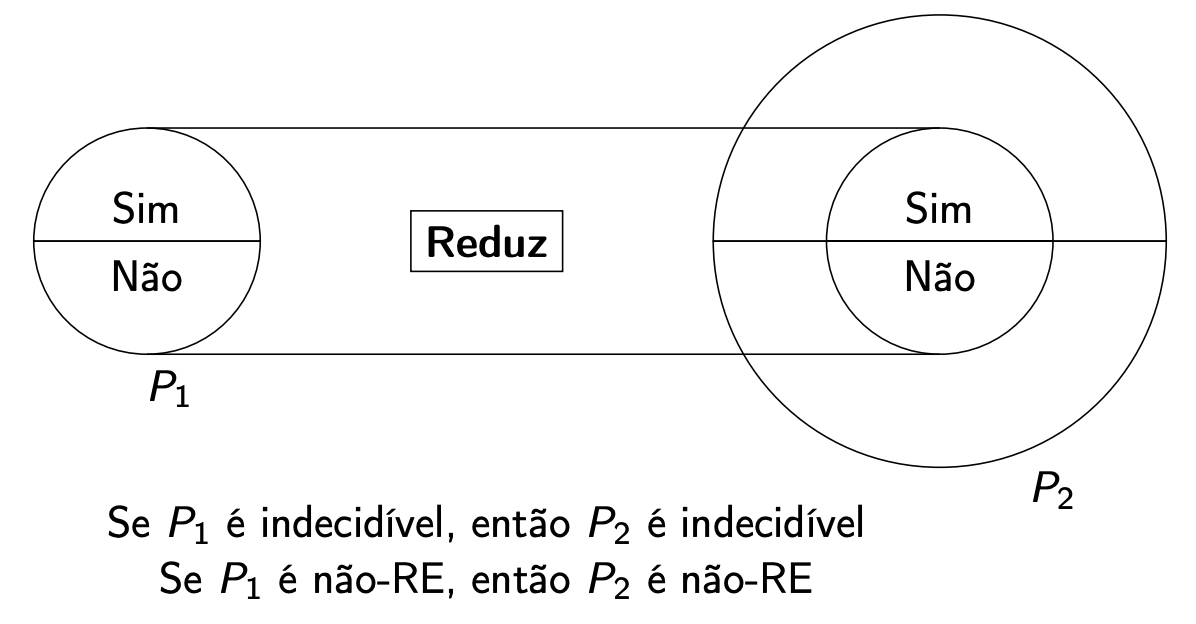

**Teorema:** Se existe uma redução de $P_1$ a $P_2$, então:
1. Se $P_1$ é indecidível, então $P_2$ é indecidível
1. Se $P_1$ é não-RE, então $P_2$ é não-RE

> **Demonstração:**
> 1. Seja $P_1$ indecidível. Se é possível decidir $P_2$, então podemos combinar a redução de $P_1$ a $P_2$ com o algoritmo que decide $P_2$ para construir um algoritmo que decide $P_1$ da seguinte forma:
  - Tome uma instância $w$ de $P_1$. Então aplique o algoritmo que converte $w$ em uma instância $x$ de $P_2$.
  - Daí, uso o algoritmo que decide $P_2$ para $x$.
  -  Se o algoritmo resultar em "Sim" ("Não"), então $x\in P_2$ ($x\not\in P_2$). Porque reduzimos $P_1$ a $P_2$, sabemos que a resposta a $w$ para $P_1$ é "Sim" ("Não"), i.e., $w\in P_1$ ($w\not\in P_1$). 
>  
>  Logo, sabemos decidir $P_1$. O que é um absurdo, pois sabemos que $P_1$ é indecidível.
> 2. Demonstração semelhante.


## [Problema da Correspondência de Post](https://www.youtube.com/watch?v=Ra-FPJdgnUk&list=PLfOnKvd6pFiqHc4KzlbttgnmWqihFPdFd&index=9)

Uma **Instância do Problema da Correspondência de Post** consiste em duas listas sobre strings a partir de um alfabeto; as duas listas devem ter o mesmo comprimento.

Em geral, nos referimos às listas $A$ e $B$ e escrevemos $A=w_1,w_2,\ldots,w_k$ e $B=x_1,x_2,\ldots,x_k$ para algum $k$; o par $\langle w_i,x_i\rangle$, para cada $i$, é dito ser **uma correspondência**.

Dizemos que essa instância do PCP tem **uma solução**, se existe uma sequência de inteiros $i_1,i_2,\ldots,i_m$ que produz as mesmas strings
        
$$w_{i_1}w_{i_2}\ldots w_{i_m}=x_{i_1}x_{i_2}\ldots x_{i_m}$$

Assim, o **Problema da Correspondência de Post é:**
> **Dada uma instância do PCP, ela tem solução???**

### Exemplo 1: Problema da Correspondência de Post

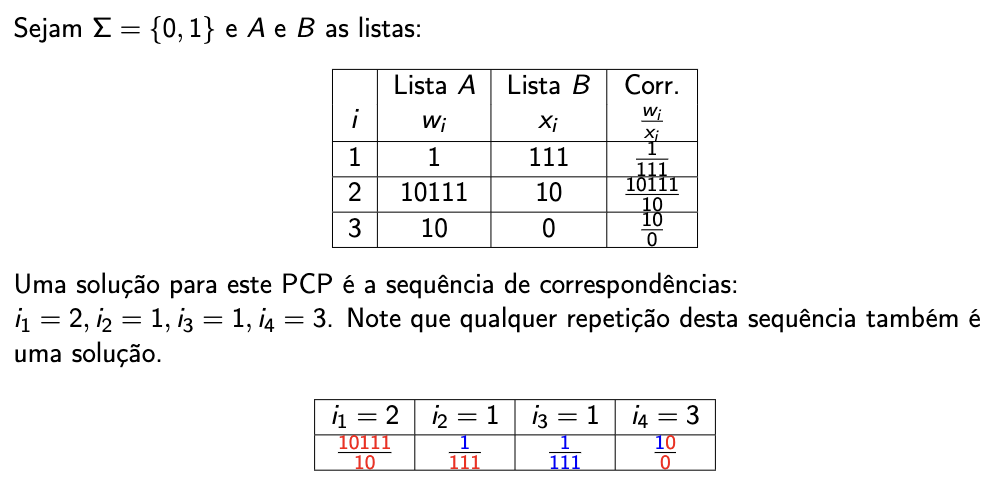

### Exemplo 2: Problema da Correspondência de Post

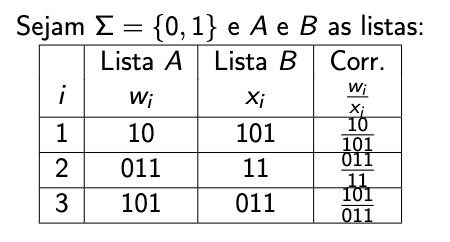


Não há solução solução. 

Note que $i_1$ não pode ser $2$ (difere em $\frac{{\color{red}{0}}11}{{\color{red}{1}}1}$) ou $3$ (difere em $\frac{{\color{red}{1}}01}{{\color{red}{0}}11}$). 

Portanto, $i_1$ deve ser $\frac{{\color{blue}{10}}}{{\color{blue}{10}}1}$. Observe que a string de $B$ é igual a string $A$, exceto por ter $1$ a mais.


Agora, temos as seguintes possibilidades para $i_2$:
- não pode ser $1$ (difere em $\frac{{\color{blue}{10}}}{{\color{blue}{101}}}\frac{{\color{blue}{1}}{\color{red}{0}}}{{\color{red}{1}}01}$).
- não pode ser $2$ (difere em $\frac{{\color{blue}{10}}}{{\color{blue}{10}}{\color{red}{1}}}\frac{{\color{red}{0}}11}{11}$).
- pode ser $3$ ($\frac{{\color{blue}{10}}}{{\color{blue}{101}}}\frac{{\color{blue}{101}}}{{\color{blue}{01}}1}$). 

Note que essa situação é igual a anterior onde a string de $B$ é igual a string $A$, exceto por ter $1$ a mais. Dessa forma, iremos repetir esse processo indefinidamente sem que a string de $A$ seja igual à $B$. 


In [ ]:
#@title Exercício 1: Solução em PCP
#@markdown Execute essa célula para gerar o seu exercício. Então, digite uma solução para o PCP . 
#@markdown **Observação: os índices (i=1,2,3,...) deverão ser separados por espaço.** 
print('Seja uma Instância do Problema de Correspondência de Post abaixo.')
Exercicio_PCP.gerar_exemplo(PCP([('1','111'), ('10111','10'), ('10','0')]),input_solution='2 1 1 3')

In [ ]:
#@title Exercício 2: Solução em PCP
#@markdown Execute essa célula para gerar o seu exercício. Então, digite uma solução para o PCP . 
#@markdown **Observação: os índices (i=1,2,3,...) deverão ser separados por espaço.** 
print('Seja uma Instância do Problema de Correspondência de Post abaixo.')
Exercicio_PCP.gerar_exemplo(PCP([('0','100'),('01','00'),('110','11')]))

In [ ]:
#@title Exercício 3: Solução em PCP
#@markdown Execute essa célula para gerar o seu exercício. Então, digite uma solução para o PCP . 
#@markdown **Observação: os índices (i=1,2,3,...) deverão ser separados por espaço.** 
print('Seja uma Instância do Problema de Correspondência de Post abaixo.')
Exercicio_PCP.gerar_exemplo(PCP([('11','1'),('01','10'),('2','12')]))

### [O PCP é Indecidível](https://www.youtube.com/watch?v=lKSo5I5MnkI&list=PLfOnKvd6pFiqHc4KzlbttgnmWqihFPdFd&index=10)

Para demonstrarmos que o PCP é indecidível, iremos considerar uma versão modificada do PCP tal que:

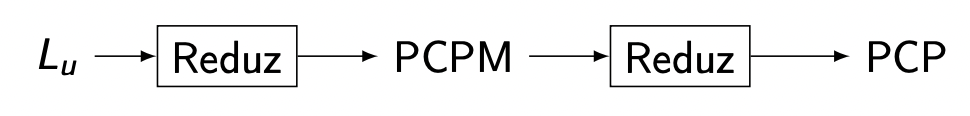

Assim, iremos reduzir $L_u$ à PCPM e reduzir PCPM à PCP. Como $L_u$ é indecidível, então $PCP$ é indecidível.
        
No PCP "Modificado", existe o requisito adicional de que a primeira correspondência nas listas $A$ e $B$ é a primeira correspondência em uma solução.  

Formalmente, uma instância do PCPM é formada por duas listas $A=w_1,w_2,\ldots,w_k$ e $B=x_1,x_2\ldots, x_k$ e uma solução é uma sequência de 0 ou mais inteiros $i_1,i_2,\ldots, i_m$ tal que
  $${\color{blue}{w_{1}}}w_{i_1}w_{i_2}\ldots w_{i_m}={\color{blue}{x_{1}}}x_{i_1}x_{i_2}\ldots x_{i_m}$$


### O PCPM se reduz à PCP

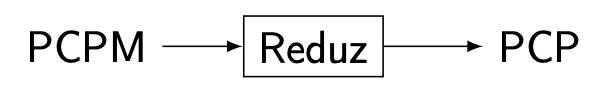

Iremos converter uma instância do PCPM em uma instância do PCP tal que: 
> PCPM tem solução $\Longleftrightarrow$ PCP tem solução.

Suponha que $*$ e $\$$ não pertencem ao $\Sigma$ de PCPM. Seja uma instância do PCPM  $A=w_1,w_2,\ldots,w_k$ e $B=x_1,x_2\ldots, x_k$. 

Construiremos uma instância do PCP $C={\color{blue}{y_0}},y_1,y_2,\ldots,y_k,{\color{blue}{y_{k+1}}}$ e $B={\color{blue}{z_0}},z_1,z_2\ldots, z_k,{\color{blue}{z_{k+1}}}$, tal que:
1. Para cada $i=1,2,\ldots,k$:
  - Seja $y_i$ o string $w_i$ com $*$ depois de cada símbolo de $w_i$.
  - Seja $z_i$ o string $x_i$ com $*$ antes de cada símbolo de $x_i$.            
1. $y_0=*y_1$ e $z_0=z_1$.
1. $y_{k+1}=\$$ e $z_{k+1}=*\$$.

Seja $i_1,i_2,\ldots, i_m$ uma solução para o PCPM tal que: $${\color{blue}{w_{1}}}w_{i_1}w_{i_2}\ldots w_{i_m}={\color{blue}{x_{1}}}x_{i_1}x_{i_2}\ldots x_{i_m}$$

Pela conversão, temos que 
- ${\color{blue}{y_{1}}}y_{i_1}y_{i_2}\ldots y_{i_m}$ tem $*$ a mais no final.
- ${\color{blue}{z_{1}}}z_{i_1}z_{i_2}\ldots z_{i_m}$ tem $*$ a mais no início.

Substitua $\langle y_1,z_1\rangle$ por $\langle y_0,z_0\rangle$. Logo, 
- ${\color{blue}{y_{0}}}y_{i_1}y_{i_2}\ldots y_{i_m}$ tem $*$ a mais no final.
- ${\color{blue}{z_{0}}}z_{i_1}z_{i_2}\ldots z_{i_m}$ tem o mesmo $*$ no início.

Por fim, adicione $\langle \$,*\$\rangle$ e teremos:

$${\color{blue}{y_{0}}}y_{i_1}y_{i_2}\ldots y_{i_m}{\color{blue}{y_{k+1}}}=
    {\color{blue}{z_{0}}}z_{i_1}y_{i_2}\ldots z_{i_m}{\color{blue}{z_{k+1}}}$$

A demonstração de que se PCP tem solução então PCPM tem solução é semelhante.

### Exemplo de Redução do PCPM à PCP

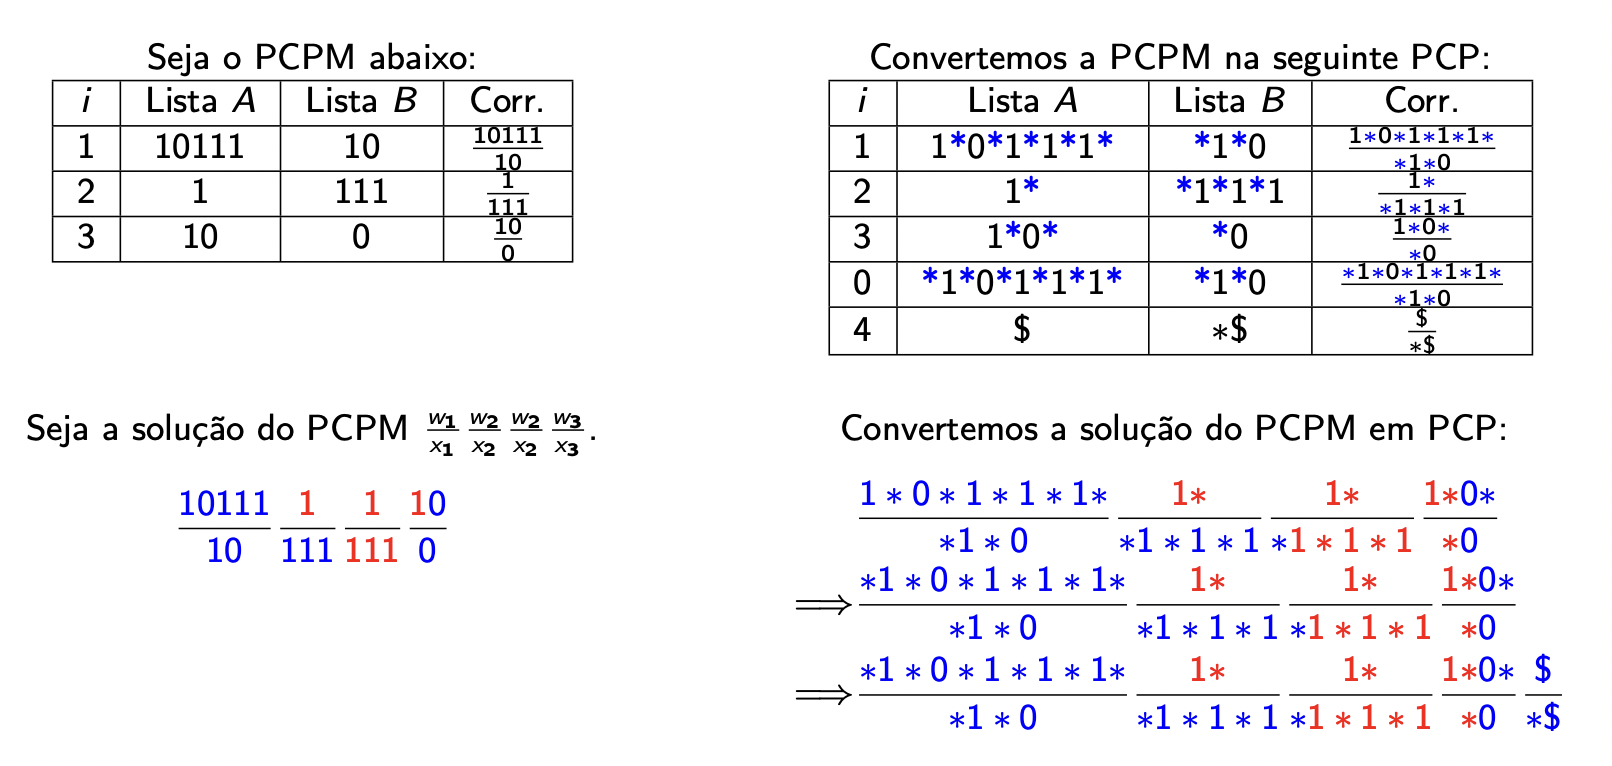


In [ ]:
#@title Exercício 4: Solução em PCPM
#@markdown Execute essa célula para gerar o seu exercício. Então, digite uma solução para o PCPM. 
#@markdown **Observação: os índices (i=1,2,3,...) deverão ser separados por espaço.** 
print('Seja uma Instância do Problema de Correspondência de Post Modificado abaixo.')
Exercicio_PCP.gerar_exemplo(PCPM([('10111','10'), ('1','111'),  ('10','0')]),input_solution='1 2 2 3')

In [ ]:
#@title Exercício 5: Converter o PCPM em PCP
#@markdown Execute essa célula para gerar o seu exercício. Então, digite uma solução para o PCPM. 
#@markdown **Observação: os índices (i=1,2,3,...) deverão ser separados por espaço.** 
display(widgets.HTML('<h3>Converta a Instância do Problema de Correspondência de Post Modificado (PCPM) abaixo na sua PCP e encontre as soluções da PCPM e PCP.</h3>'))
Exercicio_PCP.converter_pcpm(PCPM([('10111','10'), ('1','111'),  ('10','0')]))


In [ ]:
#@title Exercício 6: Converter o PCPM em PCP
#@markdown Execute essa célula para gerar o seu exercício. Então, digite uma solução para o PCPM. 
#@markdown **Observação: os índices (i=1,2,3,...) deverão ser separados por espaço.** 
display(widgets.HTML('<h3>Converta a Instância do Problema de Correspondência de Post Modificado (PCPM) abaixo na sua PCP e encontre as soluções da PCPM e PCP.</h3>'))
Exercicio_PCP.converter_pcpm(PCPM([('110','11'),('01','00'),('0','100')]))


In [ ]:
#@title Exercício 7: Converter o PCPM em PCP
#@markdown Execute essa célula para gerar o seu exercício. Então, digite uma solução para o PCPM. 
#@markdown **Observação: os índices (i=1,2,3,...) deverão ser separados por espaço.** 
display(widgets.HTML('<h3>Converta a Instância do Problema de Correspondência de Post Modificado (PCPM) abaixo na sua PCP e encontre as soluções da PCPM e PCP.</h3>'))
Exercicio_PCP.converter_pcpm(PCPM([('11','1'),('01','10'),('2','12')]))

### [A Linguagem $L_u$ se reduz à PCPM](https://www.youtube.com/watch?v=xqW4MRAaBfY&list=PLfOnKvd6pFiqHc4KzlbttgnmWqihFPdFd&index=11)

Converteremos um par $\langle M,w\rangle$ em uma instância do PCPM tal que: 
> $w\in L(M)\Longleftrightarrow$ o PCPM tem solução

Assuma que a MT não escreve branco e que ela não acessa um branco mais à esquerda da fita.

A ideia é que a instância do PCPM simule a computação de $M$ sobre $w$, i.e., as soluções parciais consistirão em string que são prefixos da sequência de IDs de $M$: 
> $\#ID_1\#ID_2\#ID_3\#\ldots$, onde $ID_1$ é a ID inicial e, para todo $i$, $ID_i\vdash ID_{i+1}$

O string da lista $B$ sempre estará uma ID à frente do string da lista $A$, exceto quando $M$ entrar em um estado de aceitação. Neste caso, usaremos correspondências que permitirão que $A$ alcance $B$.

### Exemplo $L_u$ se reduz à PCPM

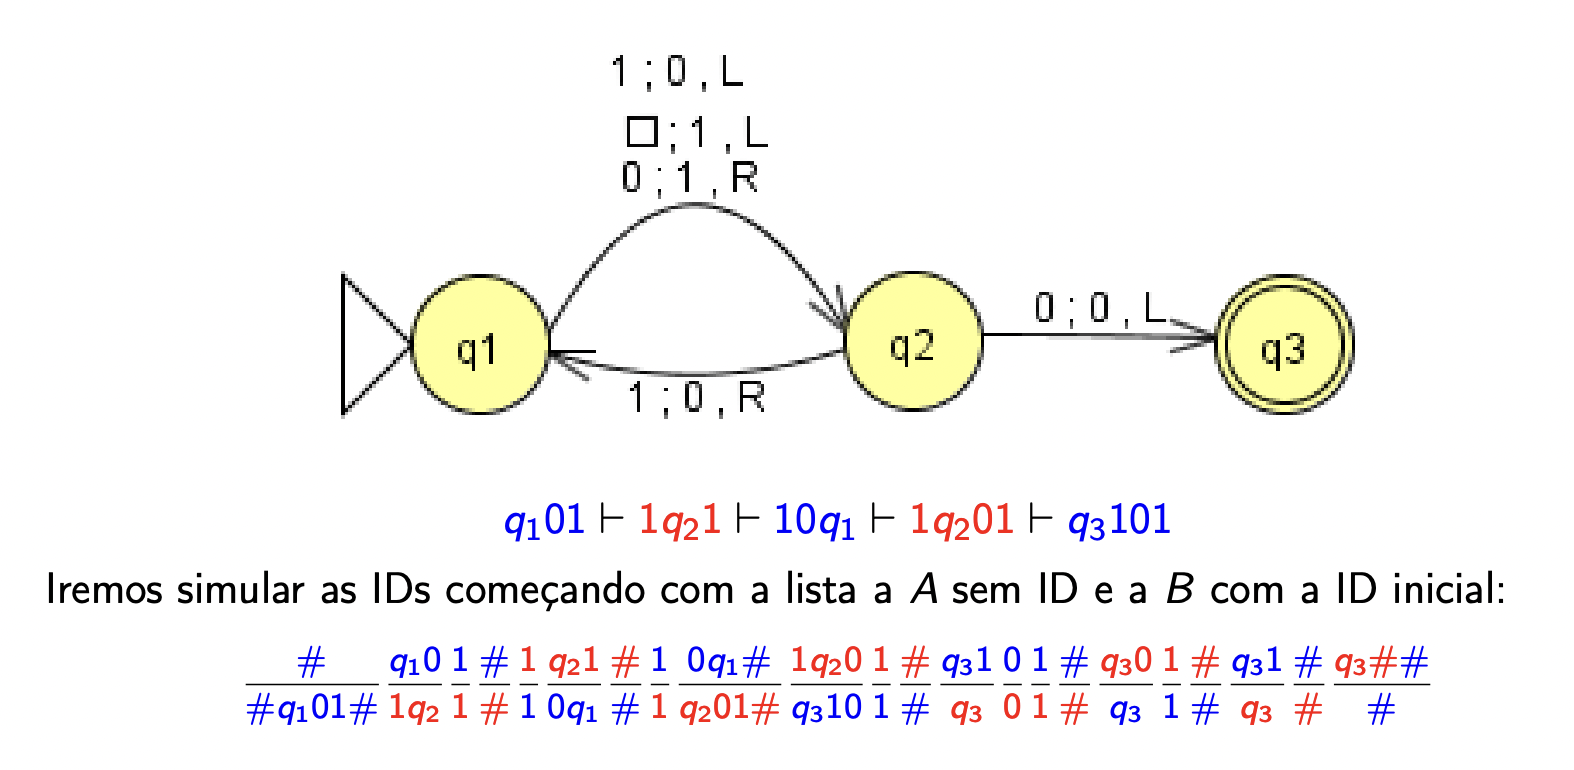

### [$L_u$ se reduz à PCPM](https://www.youtube.com/watch?v=xqW4MRAaBfY&list=PLfOnKvd6pFiqHc4KzlbttgnmWqihFPdFd&index=11)
Formalmente, sejam um MT $M$, $w$ uma string tal que $w\in L(M)$, $X,Y,Z\in \Sigma$ e $q,p\in Q$ de $M$. Construiremos uma instância do PCPM como a seguir:

1. a primeira correspondência é $\frac{\#}{\#q_0w\#}$.
1. para cada símbolo da fita $X\in\Gamma$ e o separador $\#$, acrescente $\frac{X}{X}$ e $\frac{\#}{\#}$.
1. para cada estado de não-aceitação $q\in Q-F,$ temos que:
  - $\frac{qX}{Yp}$, se $\delta(q,X)=\langle p,Y,R\rangle$.
  - $\frac{q\#}{Yp\#}$, se $\delta(q,B)=\langle p,Y,R\rangle$.
  - $\frac{ZqX}{pZY}$, se $\delta(q,X)=\langle p,Y,L\rangle$.
  - $\frac{Zq\#}{pZY\#}$, se $\delta(q,B)=\langle p,Y,L\rangle$.        
1. para cada estado de aceitação $q\in F$, temos que: $\frac{XqY}{q}, \frac{Xq}{q}, \frac{qY}{q}$.
1. Por fim, acrescente $\frac{q\#\#}{\#}$.


In [ ]:
#@title Exercício 8: Converter LU em PCPM
#@markdown Execute essa célula para gerar o seu exercício. Então, digite uma solução para o PCPM que simule a computação da palavra na MT. 
#@markdown **Observação: os índices (i=1,2,3,...) deverão ser separados por espaço.** 
Q = {'q1','q2','q3'}
Sigma = {'0','1'}
Gamma = {'0','1',S_BLK_BOX}# ' '
blank=S_BLK_BOX #='☐' 
delta = {('q1','0'):('q2','1','R'),
         ('q1',S_BLK_BOX):('q2','1','L'),
         ('q1','1'):('q2','0','L'),
         ('q2','1'):('q1','0','R'),
         ('q2','0'):('q3','0','L')}
q0 = 'q1'
F ={'q3'}

MT_pcpm = MT(Q,Sigma,Gamma,delta,q0,blank,F)

Exercicio_PCP.converter_MT(MT_pcpm,'01',input_solution='')

In [ ]:
#@title Exercício 9: Converter LU em PCPM
#@markdown Execute essa célula para gerar o seu exercício. Então, digite uma solução para o PCPM que simule a computação da palavra na MT. 
#@markdown **Observação: os índices (i=1,2,3,...) deverão ser separados por espaço.** 
Q = {'q1','q2','q3'}
Sigma = {'0','1'}
Gamma = {'0','1',S_BLK_BOX}# ' '
blank=S_BLK_BOX #='☐' 
delta = {('q1','0'):('q2','0','R'),
         ('q2','1'):('q3','1','R')}
q0 = 'q1'
F ={'q3'}

MT_pcpm = MT(Q,Sigma,Gamma,delta,q0,blank,F)
word = '01'

Exercicio_PCP.converter_MT(MT_pcpm,word,input_solution='')

In [ ]:
#@title Exercício 10: Converter LU em PCPM
#@markdown Execute essa célula para gerar o seu exercício. Então, digite uma solução para o PCPM que simule a computação da palavra na MT. 
#@markdown **Observação: os índices (i=1,2,3,...) deverão ser separados por espaço.** 
Q = {'q1','q2','q3'}
Sigma = {'0','1'}
Gamma = {'0','1',S_BLK_BOX}# ' '
blank=S_BLK_BOX #='☐' 
delta = {('q1','1'):('q2','0','R'),
         ('q2','0'):('q3','1','L')}
q0 = 'q1'
F ={'q3'}

MT_pcpm = MT(Q,Sigma,Gamma,delta,q0,blank,F)
word = '10'

Exercicio_PCP.converter_MT(MT_pcpm,word,input_solution='')